## LeNet-5
- LeNet-5은 1998년 Yann LeCun의 논문 'Gradient-Based Learning Applied to Document Recognition' 에 담겨있는 CNN 신경망의 구조를 의미합니다.
---
### 1. 등장 배경 
- LeNet-5은 Yann LeCun이 손으로 적힌 우편 번호를 전통적인 방법보다 효율적으로 확인하기 위해 고안된 CNN 구조를 말합니다. 패턴 인식에서 이용되는 전통적인 모델은 hand-designed feature extractor로 특징을 추출하고, fully-connected multi-layer networks를 분류기로 사용합니다. 이 경우에 여러가지 문제점이 발생합니다. 
---
#### 전통적인 방법의 문제점 
1. Hand-designed feature extractor는 제한된 특징만 추출합니다. 
    - hand-designed feature extractor는 입력으로부터 관련있는 정보만 수집하고 무관한 정보를 제거합니다. 이는 사람이 설계한 feature extrator이 추출한 정보만 분류기로 전달되므로 제한된 학습이 이루어질 수 밖에 없습니다. 따라서 좋은 학습은 feature extractor 그 자체에서 학습이 이루어 져야 한다고 말합니다. 

2. 너무 많은 매개변수를 포함합니다. 
    - 하나의 이미지는 몇 백개의 변수(pixel)를 포함하고 있습니다. 또한 fully-connected multi-layer의 첫 번째 layer에 이미 몇 만개의 가중치를 포함합니다. 이러한 매개변수는 시스템의 capacity를 증가시키므로 더 많은 훈련 셋이 필요하게 됩니다. 또한 많은 가중치를 저장해야 하므로 메모리 저장공간이 많이 필요하게 됩니다. 
    또한 손글씨는 사람의 글쓰기 스타일에 따라 다르므로 많은 distortion와 shift가 생기게 됩니다. fully-connected multi-layer는 이러한 변동성과 관련된 결과값을 생성하도록 학습됩니다. 하지만 입력 이미지 어디에서나 나타나는 특징을 검출하기 위해 비슷한 가중치 패턴을 가진 다수의 유닛으로 결과값을 출력해야 합니다. 이 모든 가중치 패턴을 학습하는 것은 많은 변동을 커버하기 위해 많은 학습 instance가 필요하게 됩니다.

3. 입력값의 topology가 완전히 무시됩니다. 
    - 이미지는 2D 구조를 갖고 있으므로 인접한 변수(pixel)들은 공간적으로 매우 큰 상관관계가 있습니다. fully-connected multi-layer는 인접한 변수들은 단순히 배열하여 학습하므로 공간적인 정보를 이용하지 못합니다. 
---
#### 문자 인식 업무에서 CNN
CNN은 약간의 shift, scale, distortion 불변성을 갖기 위해 세 개의 아이디어를 결합했습니다. (Local receptive field, Shared-weight, Sub-sampling)

1. 수용 영역 - receptive field 
    - CNN은 hidden unit의 receptive field를 local로 제한함으로써 local feature를 추출합니다.
    - 하나의 layer는 이전 layer의 제한된 지역에 위치해 있는 유닛의 집합을 입력으로 취합니다. receptive field를 이용하여 conner, edge, end-point와 같은 특징을 추출할 수 있게 됩니다. 
    - 이를 통해 shift, distortion이 발생하더라도 특징을 나타내는 배열이 receptive field에 검출된다면, 해당 특징을 반영한 feature map을 만들어 낼 수 있습니다. 
    - 또한 아래 그림처럼 receptive field를 이용하면 parameter 수를 줄일 수 있게 됩니다.

2. 가중치 공유 - shared weight
    - CNN은 가중치 배열을 강제로 복제함으로써 자동으로 shift 불변성을 얻습니다. 
    - feature map에 있는 unit은 동일한 weights와 bias를 공유합니다. 공유된 weight 집합을 convolution kernel로 이용하여 입력에서 모든 위치에서 동일한 특징을 추출합니다. 예를 들어, 5x5 kernel은 5x5사이즈와 설정된 Stride에 맞춰 feature map를 돌아다니며 계산하지만, 5x5의 weight와 1개의 bias 만 back propagation으로 학습을 합니다. 
    - weight를 공유하게 되면 학습 파라미터가 느는 것이 아니라, kernel를 총 몇개로 설정하는가에 따라 output인 feature map의 수와 학습해야하는 parameter만 늘게됩니다. 이 기법을 사용하면 요구되는 계산 capacity를 줄여주고, 학습할 parameter의 수를 줄여줌으로써 Overfitting 를 방지하게 되어 test error와 training error 사이의 gap도 줄여줍니다. 실제로 LeNet-5에는 340,908 connection이 존재하지만 60,000개의 trainable parameter만 존재하게 됩니다. 또한 이 기법은 입력 이미지가 변화됬으면 feature map의 결과값도 동일한 양만큼 변화됩니다. 이 덕분에 CNN은 입력의 왜곡과 변환에 대한 Robust를 갖게 됩니다. 

3. Sub-sampling  
    - sub-sampling은 현대의 pooling을 의미합니다. LeNet-5에서는 average pooling을 이용합니다. 
    - 논문에서 한번 특징이 검출되면 위치 정보의 중요성이 떨어진다고 말합니다. 예를 들어, 입력 이미지가 7이면 좌측 상단에 수평적인 end-point, 우측 상단에 corner, 이미지의 아래 부분에 수직적인 end-point를 포함합니다. 이러한 각 특징의 위치 정보는 패턴을 식별하는 것과 무관할 뿐만 아니라, 입력값에 따라 특징이 나타나는 위치가 다를 가능성이 높기 때문에 잠재적으로 유해하다고 말합니다. 
    - feature map으로 encoding되는 특징들의 위치에 대한 정확도를 감소시키기 위한 가장 간단한 방법은 feature map의 해상도를 감소시키는 것이라고 말합니다. sub-sampling layer에서 local average와 sub-sampling을 수행하여 feature map의 해상도를 감소시키고 distortion과 shift에 대한 민감도를 감소시킬 수 있다고 말합니다. 또 위치 정보를 소실시키면서 생기는 손실은, feature map size가 작아질수록 더 많은 filter를 사용하여 다양한 feature를 추출하여 상호보완할 수 있도록 합니다.

--- 


### 2. LeNet-5의 구조 
LeNet-5는 32x32 크기의 흑백 이미지에서 학습된 7 layer Convolutional Neural Network 입니다. 

[Conv(C1) - Subsampling(S2) - Conv(C3) - Subsampling(S4) - Conv(C5) - FC - FC]

저자가 사용한 표기법은 다음과 같습니다. 

- Cx : convolution layer 
- Sx : subsampling (pooling) layer
- Fx : fully-connected layer
- x : index of the layer 
---
- Input 
    - 입력 이미지는 32x32입니다. 실제 문자 이미지는 28x28 영역에서 20x20 크기의 pixel이 중앙에 있습니다. 실제 문자 이미지보다 큰 이유는 receptive field의 중앙 부분에 corner 또는 edge와 같은 특징들이 나타나길 원하기 때문입니다. 

- Layer C1 
    - 5x5 크기의 kernel 6개와 stride=1을 지닌 convolution layer 입니다. 입력 크기는 32x32x1 이고, 출력 크기는 28x28x6 입니다. 156개의 trainable parameters와 122,304개의 connections를 갖고 있습니다. 

- Layer S2
    - 2x2 크기의 kernel 6개와 stride=2을 지닌  subsampling layer 입니다. 입력 크기는 28x28x6 이고, 출력 크기는 14x14x6 입니다. 12개의 trainable parameters와 5880개의 connections를 갖고 있습니다. 

- Layer C3 
    - 5x5 크기의 kernel 16개와 stride=1을 지닌 convolution layer 입니다. 입력 크기는 14x14x6 이고, 10x10x16 입니다. 1,516개 trainable parameters와 151,600 connections를 갖고 있습니다. 
    - `모든 S2의 feature map이 C3의 feature map에 연결되지 않습니다. `
        1. 모든 feature map을 연결하지 않기 때문에 connection의 숫자를 제한시킵니다. 
        2. 서로 다른 입력값을 취하므로 C3의 각 feature map은 서로 다른 feature를 추출(상호보완적으로) 하도록 합니다.

- Layer S4
    - 2x2 크기의 kernel 16개와 stride=2을 지닌 subsampling layer 입니다. 입력 크기는 10x10x16 이고, 출력 크기는 5x5x16입니다. 32개의 trainable parameters와 2,000개의 connections를 갖고 있습니다. 

- Layer C5
    - 5x5 크기의 kernel 120개와 stride=1을 지닌 convolution layer 입니다. 입력 크기는 5x5x16 이고, 출력 크기는  1x1x120 입니다. 10,164개의 trainable parameters를 갖고 있습니다. 

- Layer F6
    - tanh 함수를 활성화 함수로 이용하는 fully-connected layer 입니다. 입력 유닛은 120개 이고, 출력 유닛은 84개입니다. 
    - 출력 유닛이 84인 이유는 ASCll set을 해석하기 적합한 형태로 나와주길 바라는 마음으로 설정했다고 말합니다. 각각의 문자가 7x12크기의 bitmap이기 때문입니다. 

- Layer F7
    - RBF(Euclidean Radia Basis Function unit)를 활성화 함수로 이용하는 output layer 입니다. 입력 크기는 84이고, 출력 크기는 10입니다. MNIST 데이터를 이용했기 때문에 출력크기가 10입니다. 

- Loss function
    - Loss function은 MSE(평균 제곱 오차)를 이용했습니다. 
---

### 3. Pytorch 구현

#### 1. 필요한 라이브러리 import 

In [1]:
# library 
import numpy as np 
from datetime import datetime
import copy

import torch, torchvision
import torch.nn as nn 
import torch.nn.functional as F
from torch.utils.data import DataLoader

from torchvision import datasets, transforms 

import matplotlib.pyplot as plt 

DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

/opt/conda/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### 2. Parameters 설정 

In [2]:
# parameters 
RANDOM_SEED = 42
LEARNING_RATE = 0.001
BATCH_SIZE = 32
N_EPOCHS = 10

IMG_SIZE = 32
N_CLASSES = 10 

#### 3. 정확도를 구하는 function과 손실을 시각화 하는 function 정의 

In [3]:
# 전체 data_loader에 대한 예측의 정확도를 계산하는 함수 
def get_accuracy(model, data_loader, device):
    
    correct_pred = 0 
    n = 0 
    
    with torch.no_grad():
        model.eval()
        for X, target in data_loader:
            X = X.to(device)
            target = target.to(device)
            
            _, y_prob = model(X)
            predicted_labels = torch.argmax(y_prob, dim=1)
            
            n += target.size(0)
            correct_pred += (predicted_labels == target).sum()
    
    acc = correct_pred.float() / n        
    return acc.cpu()

In [4]:
def plot_losses_accuracies(train_hist, valid_hist):
    '''
    training과 validation loss, accuracy를 시각화하는 함수
    '''
    # losses
    train_losses = np.array(train_hist['losses'])
    valid_losses = np.array(valid_hist['losses'])
    # accuracy
    train_acc = np.array(train_hist["acc"])
    valid_acc = np.array(valid_hist["acc"])
    
    
    # plot style을 seaborn으로 설정 
    plt.style.use('seaborn')
        
    fig, ax = plt.subplots(1,2, figsize=(15, 8))
    
    ax[0].plot(train_losses, color='blue', label='Training loss')
    ax[0].plot(valid_losses, color='red', label='Validation_loss')
    ax[0].set(title='Losses over epochs',
           xlabel='Epoch',
           ylabel='Loss')
    ax[0].legend()
    ax[1].plot(train_acc, color='blue', label='Training accuracy')
    ax[1].plot(valid_acc, color='red', label='Validation accuracy')
    ax[1].set(title='Accuracy over epochs',
           xlabel='Epoch',
           ylabel='ACC')
    ax[1].legend()
    fig.show()
    
    # plot style을 기본값으로 설정 
    plt.style.use('default')

#### 4. training data에 사용되는 helper 함수 정의하기 

In [5]:
# training loop의 training 단계의 대한 함수
def train(train_loader, model, criterion, optimizer, device):

    model.train()
    running_loss = 0 
    
    for X, target in train_loader:
        
        optimizer.zero_grad()
        X = X.to(device)
        target = target.to(device)
        
        # forward 
        y_hat, _ = model(X)
        loss = criterion(y_hat, target)
        running_loss += loss.item()
        
        # backward
        loss.backward()
        optimizer.step()
        
    epoch_loss = running_loss / len(train_loader)
    return model, optimizer, epoch_loss 

#### 5. validation data에 사용되는 함수 정의

In [6]:
#training loop의 validation 단계에 대한 함수
def validate(valid_loader, model, criterion, device):
    
    model.eval()
    running_loss = 0
    
    for X, target in valid_loader:
        X = X.to(device)
        target = target.to(device)
        
        # forward와 loss 기록
        y_hat, _ = model(X)
        loss = criterion(y_hat, target)
        running_loss += loss.item()
        
    epoch_loss = running_loss / len(valid_loader)
    return model, epoch_loss        

#### 6. training loop 정의 

In [7]:
def training_loop(model, criterion, optimizer, train_loader, valid_loader, epochs, device):
    '''
    전체 training loop를 정의하는 함수
    '''
    
    # metrics를 저장하기 위한 객체 설정
    best_loss = float('inf')
    train_hist = {'losses':[], 
                  'acc':[]}
    valid_hist = {'losses':[],
                  'acc':[]}
    
    # model 학습 
    for epoch in range(0, epochs):
        
        # training 
        model, optimizer, train_loss = train(train_loader, model, criterion, optimizer, device)
        train_hist['losses'].append(train_loss) 
        
        # validation 
        with torch.no_grad():
            model, valid_loss = validate(valid_loader, model, criterion, device)
            valid_hist['losses'].append(valid_loss) 
                  
        train_acc = get_accuracy(model, train_loader, device)
        valid_acc = get_accuracy(model, valid_loader, device)
        train_hist['acc'].append(train_acc)
        valid_hist['acc'].append(valid_acc)
                
        print(f'{datetime.now().time().replace(microsecond=0)} --- '
                f'Epoch: {epoch}\t'
                f'Train loss: {train_loss:.4f}\t'
                f'Valid loss: {valid_loss:.4f}\t'
                f'Train accuracy: {100 * train_acc:.2f}\t'
                f'Valid accuracy: {100 * valid_acc:.2f}')  
        
        if  valid_loss < best_loss:
            best_loss = valid_loss
            best_model_wts = copy.deepcopy(model.state_dict())
            torch.save(model.state_dict(), './LeNet5_best_weight.pt')
            print('[Copied best model weights]')
        
    plot_losses_accuracies(train_hist, valid_hist) 
    
    # 제일 성능이 좋았던 모델 반환
    model.load_state_dict(best_model_wts)
    return model, optimizer, [train_hist, valid_hist]     

#### 7. data 준비하기 
- data는 torchvision에서 제공하는 MNIST data를 사용합니다. 

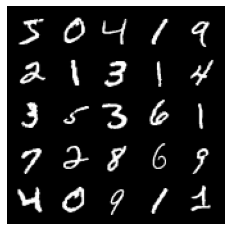

In [8]:
# transforms 정의 
transformer = transforms.Compose([
    transforms.Resize((32,32)),
    transforms.ToTensor()])

### MNIST data 
# train dataset
train_data = datasets.MNIST(root='./torchvision_data', download=True, train=True, transform=transformer)
# valid dataset
valid_data = datasets.MNIST(root='./torchvision_data', download=True, train=False, transform=transformer)

### DataLoader 정의 
# train 
train_ld = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
# valid
valid_ld = DataLoader(dataset=valid_data, batch_size=BATCH_SIZE, shuffle=False)

### 불러온 데이터 확인 
x_train = train_data.data
x_train = x_train.unsqueeze(1) if len(x_train.shape) == 3 else x_train 
check_im = torchvision.utils.make_grid(x_train[:25], nrow=5, padding=5)

plt.imshow(transforms.ToPILImage()(check_im).convert('L'), cmap='gray')
plt.axis('off')
plt.show()

#### 8. LeNet-5 구조 정의

In [9]:
class LeNet_5(nn.Module):
    
    def __init__(self, n_classes):
        super(LeNet_5, self).__init__()
        
        self.feature_extractor = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, stride=1),
            nn.Tanh(),
            nn.AvgPool2d(kernel_size=2),
            nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1),
            nn.Tanh(),
            nn.AvgPool2d(kernel_size=2),
            nn.Conv2d(in_channels=16, out_channels=120, kernel_size=5, stride=1),
            nn.Tanh()
        )
        self.classifier = nn.Sequential(
            nn.Linear(in_features=120, out_features=84),
            nn.Tanh(),
            nn.Linear(in_features=84, out_features=n_classes)
        )
        
    def forward(self, x):
        x = self.feature_extractor(x)
        x = torch.flatten(x,1)
        logits = self.classifier(x)       # loss를 cross entropy로 사용하여 계산할 예정 
        probs = F.softmax(logits, dim=1)  # 예측 확률 
        return logits, probs

#### 9. model, optimizer, loss function 설정 

In [10]:
torch.manual_seed(RANDOM_SEED)

model = LeNet_5(N_CLASSES).to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)
criterion = nn.CrossEntropyLoss()

In [11]:
from torchsummary import summary

summary(model, input_size=(1,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 28, 28]             156
              Tanh-2            [-1, 6, 28, 28]               0
         AvgPool2d-3            [-1, 6, 14, 14]               0
            Conv2d-4           [-1, 16, 10, 10]           2,416
              Tanh-5           [-1, 16, 10, 10]               0
         AvgPool2d-6             [-1, 16, 5, 5]               0
            Conv2d-7            [-1, 120, 1, 1]          48,120
              Tanh-8            [-1, 120, 1, 1]               0
            Linear-9                   [-1, 84]          10,164
             Tanh-10                   [-1, 84]               0
           Linear-11                   [-1, 10]             850
Total params: 61,706
Trainable params: 61,706
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/ba

#### 10. 신경망 학습하기 

06:29:53 --- Epoch: 0	Train loss: 0.2301	Valid loss: 0.0899	Train accuracy: 97.26	Valid accuracy: 97.04
[Copied best model weights]
06:30:11 --- Epoch: 1	Train loss: 0.0765	Valid loss: 0.0719	Train accuracy: 97.92	Valid accuracy: 97.81
[Copied best model weights]
06:30:28 --- Epoch: 2	Train loss: 0.0533	Valid loss: 0.0561	Train accuracy: 98.51	Valid accuracy: 98.22
[Copied best model weights]
06:30:46 --- Epoch: 3	Train loss: 0.0428	Valid loss: 0.0484	Train accuracy: 99.05	Valid accuracy: 98.48
[Copied best model weights]
06:31:04 --- Epoch: 4	Train loss: 0.0353	Valid loss: 0.0545	Train accuracy: 99.15	Valid accuracy: 98.29
06:31:22 --- Epoch: 5	Train loss: 0.0299	Valid loss: 0.0430	Train accuracy: 99.41	Valid accuracy: 98.72
[Copied best model weights]
06:31:40 --- Epoch: 6	Train loss: 0.0264	Valid loss: 0.0462	Train accuracy: 99.42	Valid accuracy: 98.67
06:31:58 --- Epoch: 7	Train loss: 0.0218	Valid loss: 0.0441	Train accuracy: 99.40	Valid accuracy: 98.72
06:32:16 --- Epoch: 8	Train 

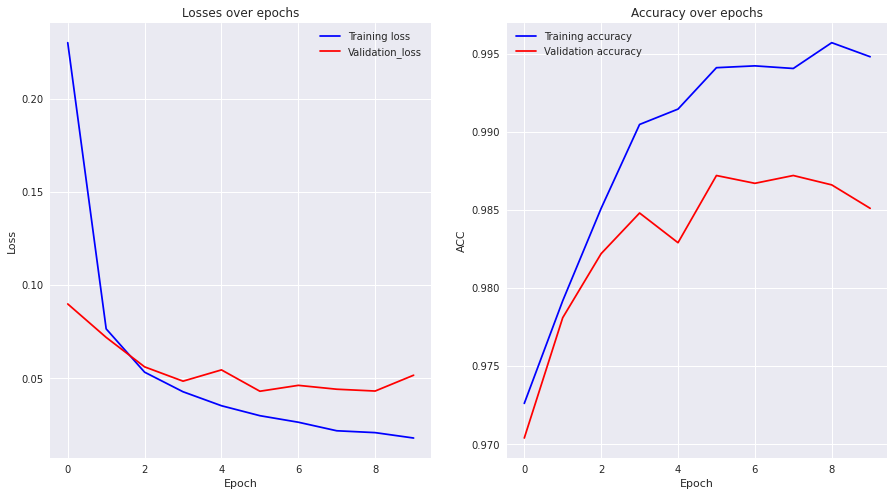

In [12]:
model, optimizer, hist = training_loop(model, criterion, optimizer, train_ld, valid_ld, N_EPOCHS, DEVICE)

#### 11. 예측 결과 확인 

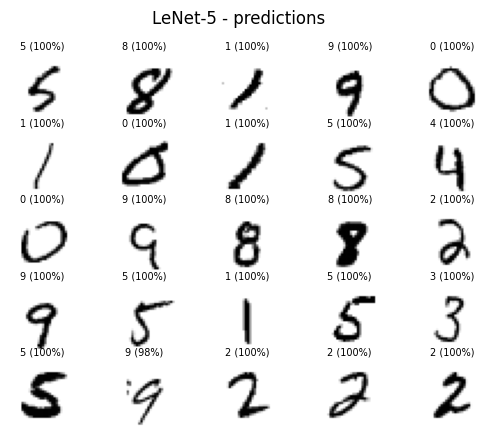

In [41]:
random_index = np.random.choice(len(valid_data), size=25, replace=False)

fig = plt.figure()
for i, index in enumerate(random_index):
    with torch.no_grad():
        model.eval()
        _, probs = model(valid_data[index][0].unsqueeze(0).to(DEVICE))
        
    title = f'{torch.argmax(probs)} ({torch.max(probs * 100):.0f}%)'    
    
    plt.subplot(5, 5, i+1)
    plt.axis('off')
    plt.imshow(valid_data.data[index], cmap='gray_r')
    plt.title(title, fontsize=7)
    
fig.suptitle('LeNet-5 - predictions');